## <span style="color: red;">Alert FISSA Study</span>

### <span style="color: red;">Data Exploration and Descriptive Statistics</span>

In [153]:
import sys
import os

# Ajouter le chemin vers le dossier parent qui contient src
sys.path.append(os.path.abspath("../"))  # "../" car notebooks/ est au même niveau que src/

import src
from src.clean import load_data_and_dict


In [154]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns  
import math
import missingno as msn   
import janitor
import re     
from dateutil import parser
# Install local package using "pip install -e . --config-setting editable_mode=compat"
import src  
from src.clean import load_data_and_dict       
from collections import Counter
import os
from dotenv import load_dotenv

## <span style="load data;">Data Exploration and Descriptive Statistics</span>

In [155]:
data = pd.read_csv("../data/fissa_full_data_cleaned.csv")
data.head()


,Unnamed: 0,age_group,sid2,feasibility_contact,hospitalized_last_14_days,signed_consent,date_confirmed,date_inclusion,dob,gender,...,date_last_visit,outcome_d7_sens2,outcome_d14,outcome_d21,outcome_d21_sens,died_1m,date_exit,d_last_visit,ptime,age
0,0,<5,1,Yes,No,Yes,2020-12-21,2020-12-21,2020-03-20,Male,...,2021-01-11,1.0,1.0,1.0,1.0,0.0,2020-12-28,21.0,7.0,6.0
1,1,<5,2,Yes,No,Yes,2020-02-20,2020-02-20,2020-03-20,Male,...,2020-03-12,1.0,1.0,1.0,1.0,0.0,2020-02-27,21.0,7.0,6.0
2,2,<5,3,Yes,No,Yes,2020-02-21,2020-02-21,2018-08-01,Male,...,2020-03-12,1.0,1.0,1.0,1.0,0.0,2020-02-27,20.0,6.0,2.0
3,3,<5,4,Yes,No,Yes,2020-02-21,2020-02-21,2020-03-20,Female,...,2020-03-13,1.0,1.0,1.0,1.0,0.0,2020-02-28,21.0,7.0,6.0
4,4,<5,5,Yes,No,Yes,2020-02-21,2020-02-21,2020-03-20,Male,...,2020-03-11,1.0,1.0,1.0,1.0,0.0,2020-02-26,19.0,5.0,6.0


In [156]:
print(f"Shape of the data: {data.shape}")

Shape of the data: (9128, 795)


#### <span style="color: red;"> Distribion of sample by gender </span>

In [157]:
gender_counts = data['gender'].value_counts()
gender_counts

Male      4759
Female    4369
Name: gender, dtype: int64

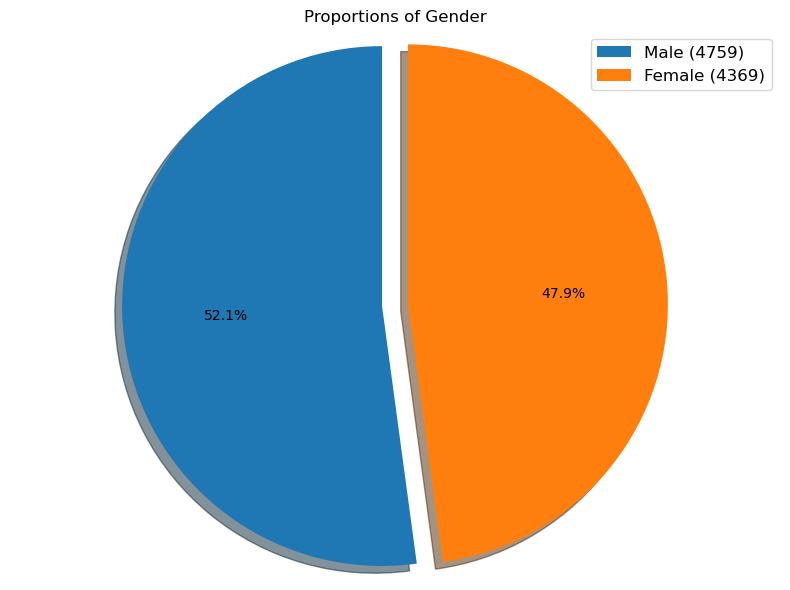

In [158]:
import matplotlib.pyplot as plt

# Count the occurrences and proportions
gender_counts = data['gender'].value_counts()
proportions = gender_counts / gender_counts.sum() * 100

# Define labels safely
labels = [f'{g} ({c})' for g, c in zip(gender_counts.index, gender_counts.values)]
colors = ['#1f77b4', '#ff7f0e']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=(0.1, 0))
plt.legend(labels, loc='upper right', fontsize=12)
plt.title('Proportions of Gender')
plt.axis('equal')
plt.tight_layout()

# Save and show
plt.savefig('../results/Gender_Proportions.png', dpi=300)
plt.show()


In [159]:
"AGE" in data

False

**The dataset contains 4369 female, representing 52.1% and 4759 maleaccounting for 47.9%.**

# Distribution of the age_group

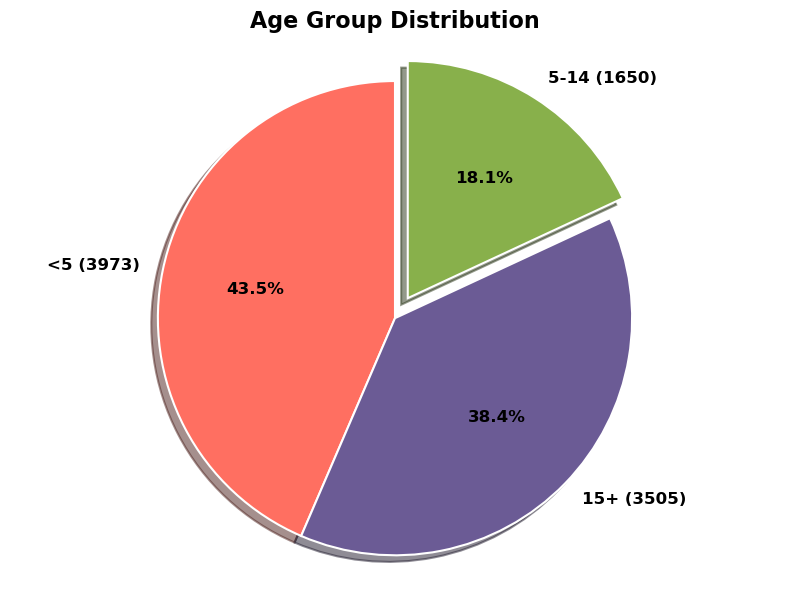

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences and proportions
age_counts = data['age_group'].value_counts()
proportions = age_counts / age_counts.sum() * 100

# Labels with number of individuals
labels = [f'{g} ({c})' for g, c in zip(age_counts.index, age_counts.values)]

# Choose a pretty color palette (pastel)
colors = ['#FF6F61', '#6B5B95', '#88B04B']
# Explode the smallest slice to highlight it
explode = [0.1 if p == min(proportions) else 0 for p in proportions]

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    proportions,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(age_counts)], 
    shadow=True,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'weight': 'bold'}
)

plt.title('Age Group Distribution', fontsize=16, weight='bold')
plt.axis('equal')  
plt.tight_layout()

# Save the chart
plt.savefig('../results/AgeGroup_Distribution.png', dpi=300)
plt.show()


# Distribution of age_group by gender

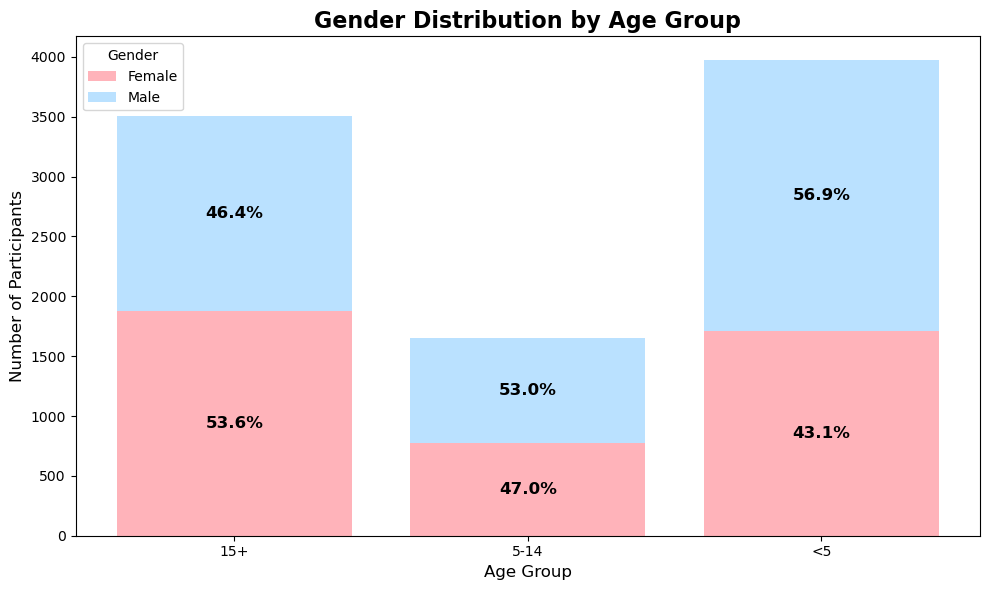

In [161]:


# Create a cross-tabulation: number of participants by age_group and gender
age_gender_counts = pd.crosstab(data['age_group'], data['gender'])

# Calculate percentages for each bar
age_gender_percent = age_gender_counts.div(age_gender_counts.sum(axis=1), axis=0) * 100

# Colors for each gender
colors = ['#FFB3BA', '#BAE1FF']  

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(age_gender_counts))  

for i, gender in enumerate(age_gender_counts.columns):
    ax.bar(age_gender_counts.index, age_gender_counts[gender], bottom=bottom, color=colors[i], label=gender)
    # Add percentages in the center of each colored section
    for j, value in enumerate(age_gender_counts[gender]):
        pct = age_gender_percent[gender][j]
        if value > 0:
            ax.text(j, bottom[j] + value/2, f'{pct:.1f}%', ha='center', va='center', color='black', fontsize=12, weight='bold')
    bottom += age_gender_counts[gender]

# Customization
ax.set_title('Gender Distribution by Age Group', fontsize=16, weight='bold')
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Participants', fontsize=12)
ax.legend(title='Gender')
ax.grid(False)  # remove grid

plt.tight_layout()
plt.savefig('../results/Gender_by_AgeGroup_Percent.png', dpi=300)
plt.show()


In [162]:
# Comptage des occurrences de chaque valeur
data['country'].value_counts()


Cameroon         1903
CAR              1243
Guinea           1243
Cote d'Ivoire    1103
Ghana             694
Tanzania          663
Uganda            625
Madagascar        499
Senegal           416
Nigeria           411
Gambia            328
Name: country, dtype: int64

# Contry Distribution

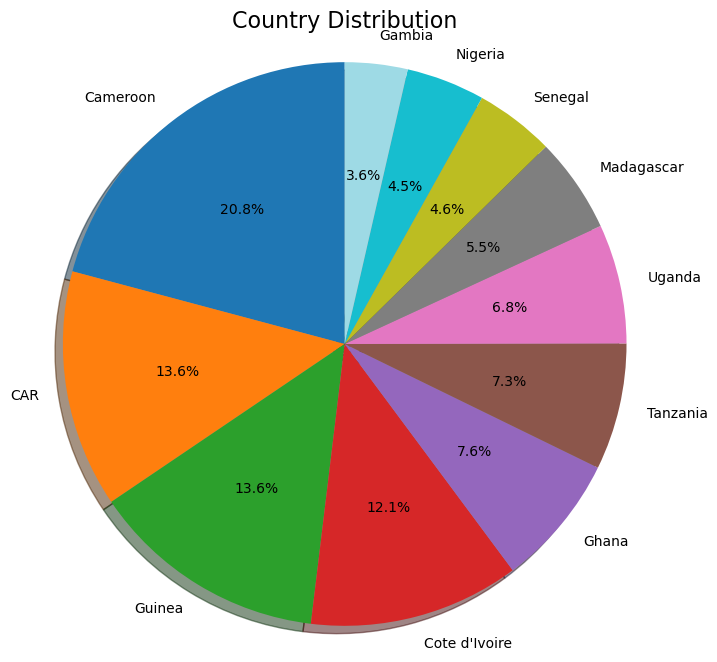

In [163]:

# Count the occurrences
counts = data['country'].value_counts()

# Create the pie chart
plt.figure(figsize=(8,8))
counts.plot(kind='pie', 
            autopct='%1.1f%%',   
            startangle=90,      
            cmap='tab20',        
            shadow=True)         
plt.title("Country Distribution", fontsize=16)
plt.ylabel("")  
plt.axis('equal')  
plt.show()


In [164]:
# Dictionnaire de renommage
rename_dict = {
    'malaria': 'Malaria',
    'tb': 'Tuberculosis',
    'eti_dengue': 'Dengue',
    'eti_lassa': 'Lassa',
    'eti_ebola': 'Ebola',
    'eti_hiv_aids': 'HIV',
    'eti_rabies': 'Rabies',
    'eti_measles': 'Measles',
    'eti_influenza': 'Influenza',
    'eti_typhoid': 'Typhoid'
}

# Appliquer le renommage
data.rename(columns=rename_dict, inplace=True)


In [165]:

print(*data.columns, sep=' , ')
data.shape

Unnamed: 0 , age_group , sid2 , feasibility_contact , hospitalized_last_14_days , signed_consent , date_confirmed , date_inclusion , dob , gender , distance_home_facility , education_level , q11a_inc_1 , q11a_inc_2 , q11a_inc_3 , q11a_inc_4 , q11a_inc_5 , q13c_inc_1 , q13c_inc_2 , q13c_inc_3 , q13c_inc_4 , q13c_inc_5 , q13c_inc_6 , q13h_1_inc_1 , q13h_1_inc_2 , q13h_1_inc_3 , q14a_inc_1 , q14a_inc_2 , q14a_inc_3 , q14a_inc_4 , q14a_inc_5 , q14a_inc_6 , q14a_inc_7 , q14a_inc_8 , q14a_inc_9 , q14a_inc_10 , q14a_inc_11 , q15a_inc_1 , q15a_inc_2 , q15a_inc_3 , q15a_inc_4 , q15a_inc_5 , q15a_inc_6 , q15a_inc_7 , q15a_inc_8 , q15a_inc_9 , q15a_inc_10 , q15a_inc_11 , q15a_inc_12 , q15a_inc_13 , q15a_inc_14 , q15a_inc_15 , q15a_inc_16 , q15a_inc_17 , q15a_inc_18 , duration_of_symptoms , duration_of_fever , q17a_inc_1 , q17a_inc_2 , q17a_inc_3 , q17a_inc_4 , q17a_inc_5 , q17a_inc_6 , q17a_inc_7 , q17a_inc_8 , q17a_inc_9 , q17a_inc_10 , q17a_inc_11 , q17b_inc_1 , q17b_inc_2 , q17b_inc_3 , q17b_i

(9128, 795)

# Distribution of Desease by country

In [166]:
diseases = ['Malaria', 'Tuberculosis', 'Dengue', 'Lassa', 'Ebola', 'HIV', 'Rabies', 'Measles', 'Influenza', 'Typhoid','diabetes','eti_inf_other']

for disease in diseases:
    unique_vals = data[disease].unique()
    print(f"{disease}: {unique_vals}")


Malaria: [0 1]
Tuberculosis: [0 1]
Dengue: [0. 1.]
Lassa: [0. 1.]
Ebola: [0. 1.]
HIV: [0. 1.]
Rabies: [0. 1.]
Measles: [0. 1.]
Influenza: [0. 1.]
Typhoid: [0. 1.]
diabetes: [0. 1.]
eti_inf_other: [0 1]


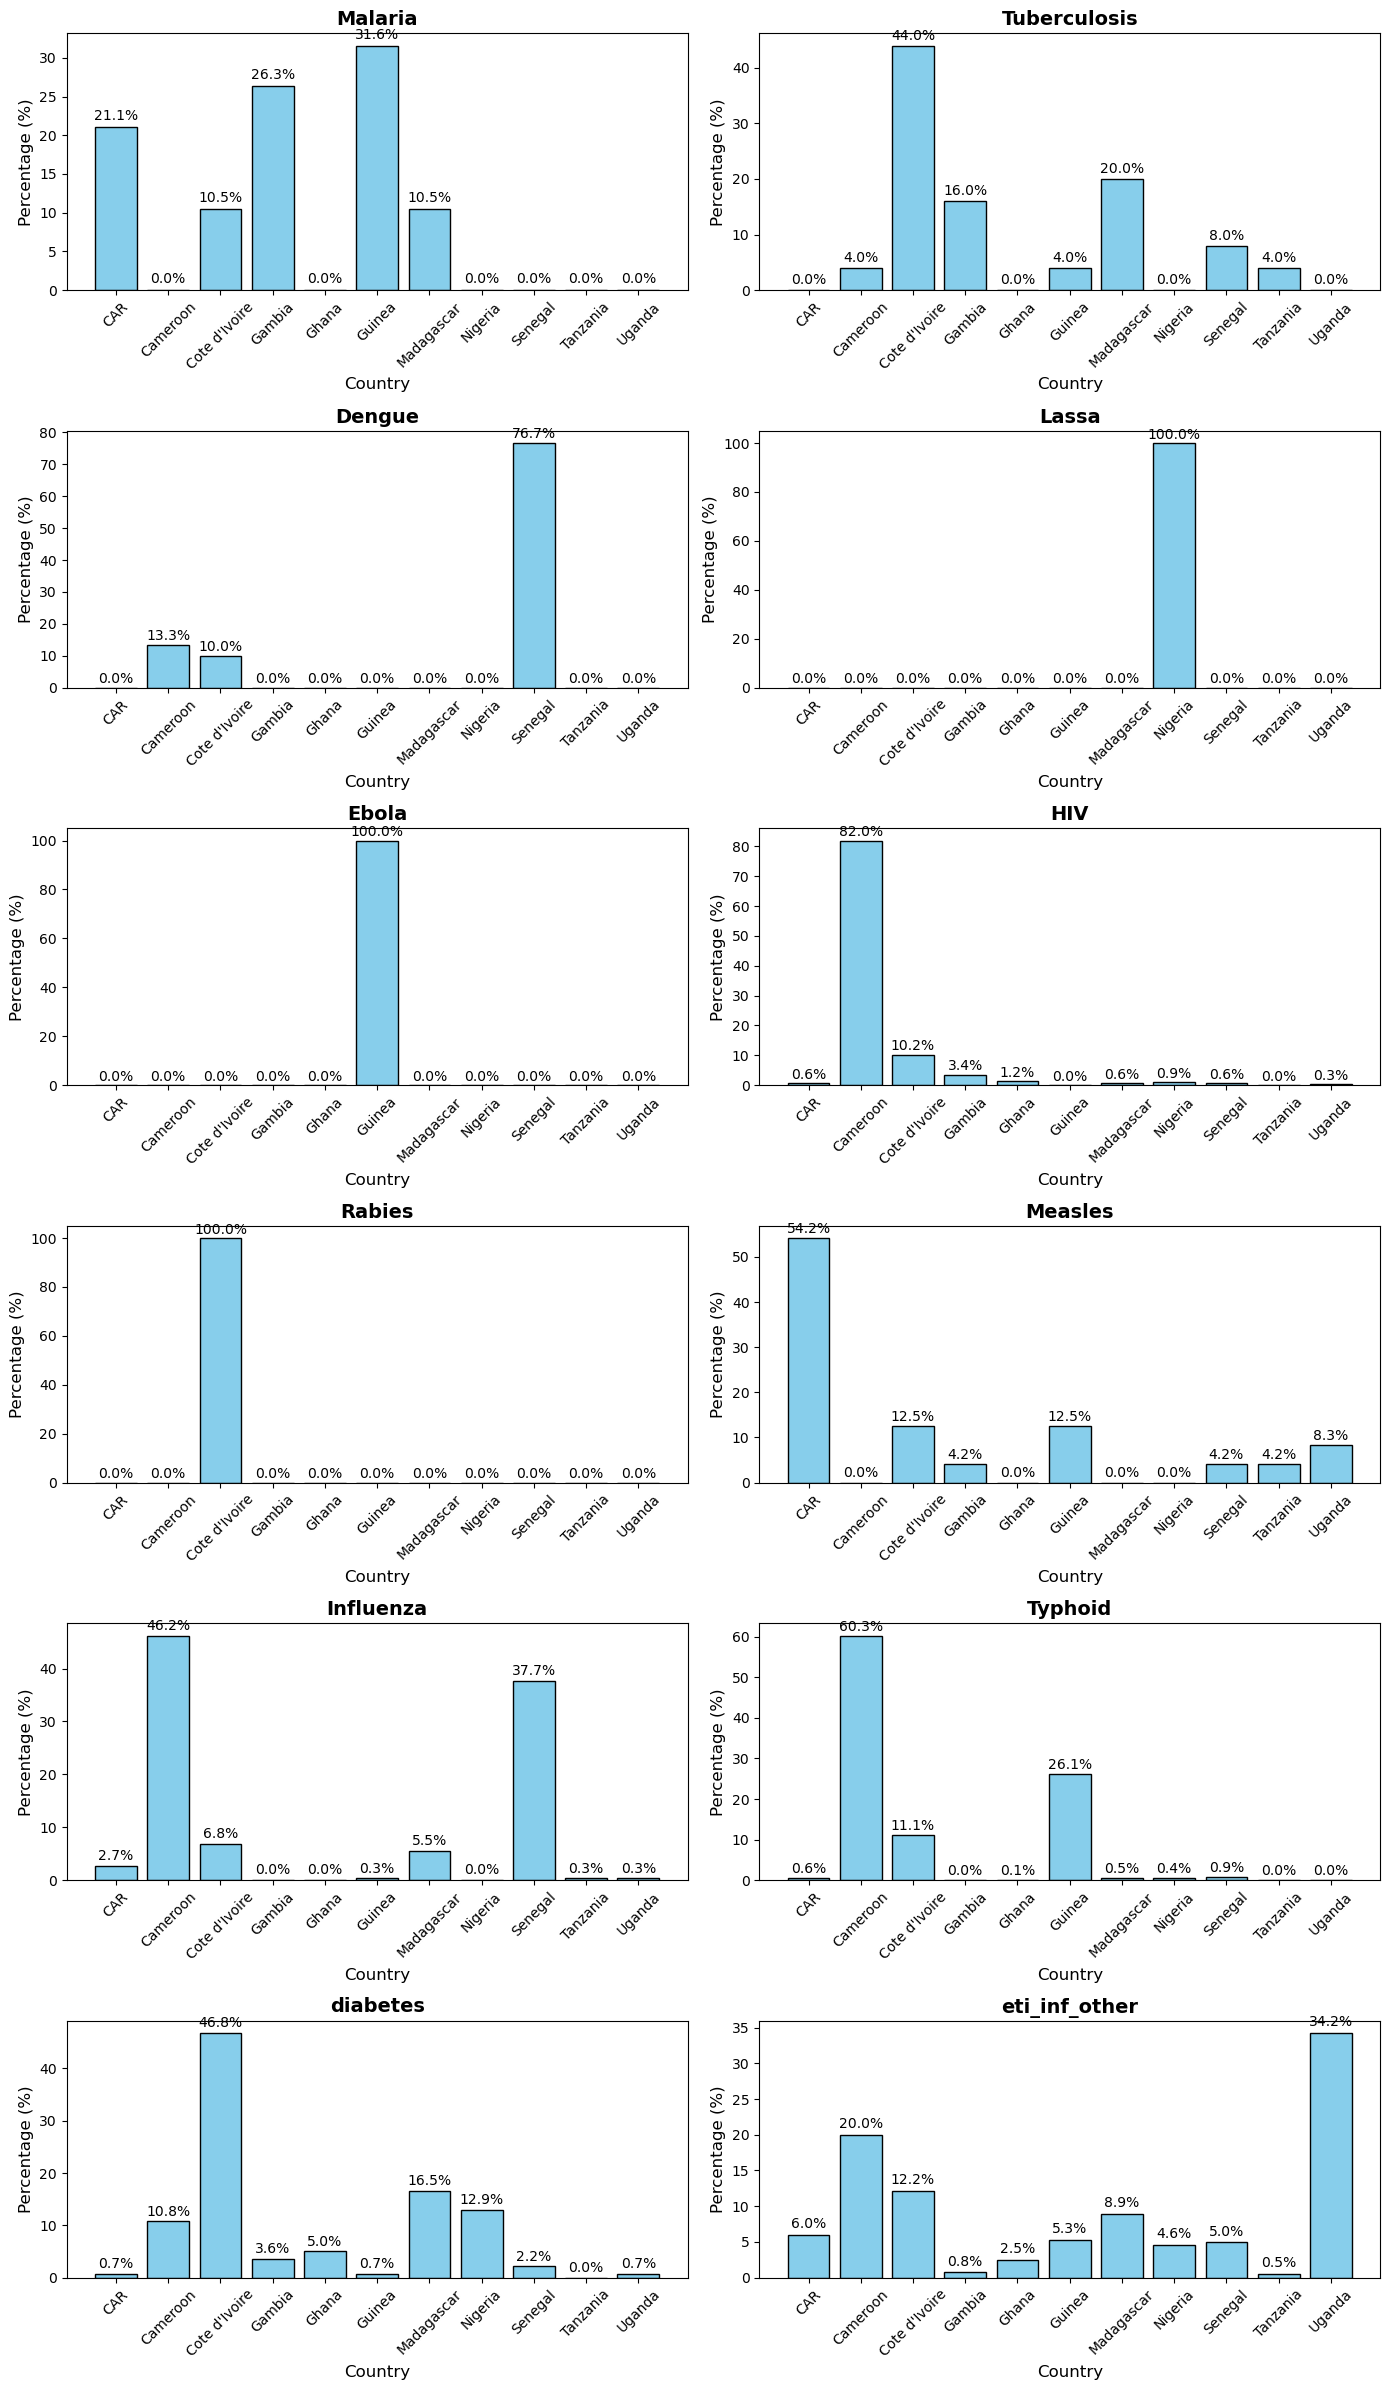

In [167]:

# Number of rows and columns for subplots
n_cols = 2
n_rows = (len(diseases) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    counts = data.groupby('country')[disease].sum()
    total = counts.sum()
    percentages = counts / total * 100  # Calculate percentages
    
    axes[i].bar(counts.index, percentages.values, color='skyblue', edgecolor='black')
    axes[i].set_title(disease, fontsize=14, weight='bold')
    axes[i].set_xlabel("Country", fontsize=12)
    axes[i].set_ylabel("Percentage (%)", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Remove the grid
    axes[i].grid(False)
    
    # Add percentages above the bars
    for j, val in enumerate(percentages.values):
        axes[i].text(j, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=10)

# Remove empty axes if the number of diseases is odd
for k in range(i+1, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


# Distribution of Desease by age_group

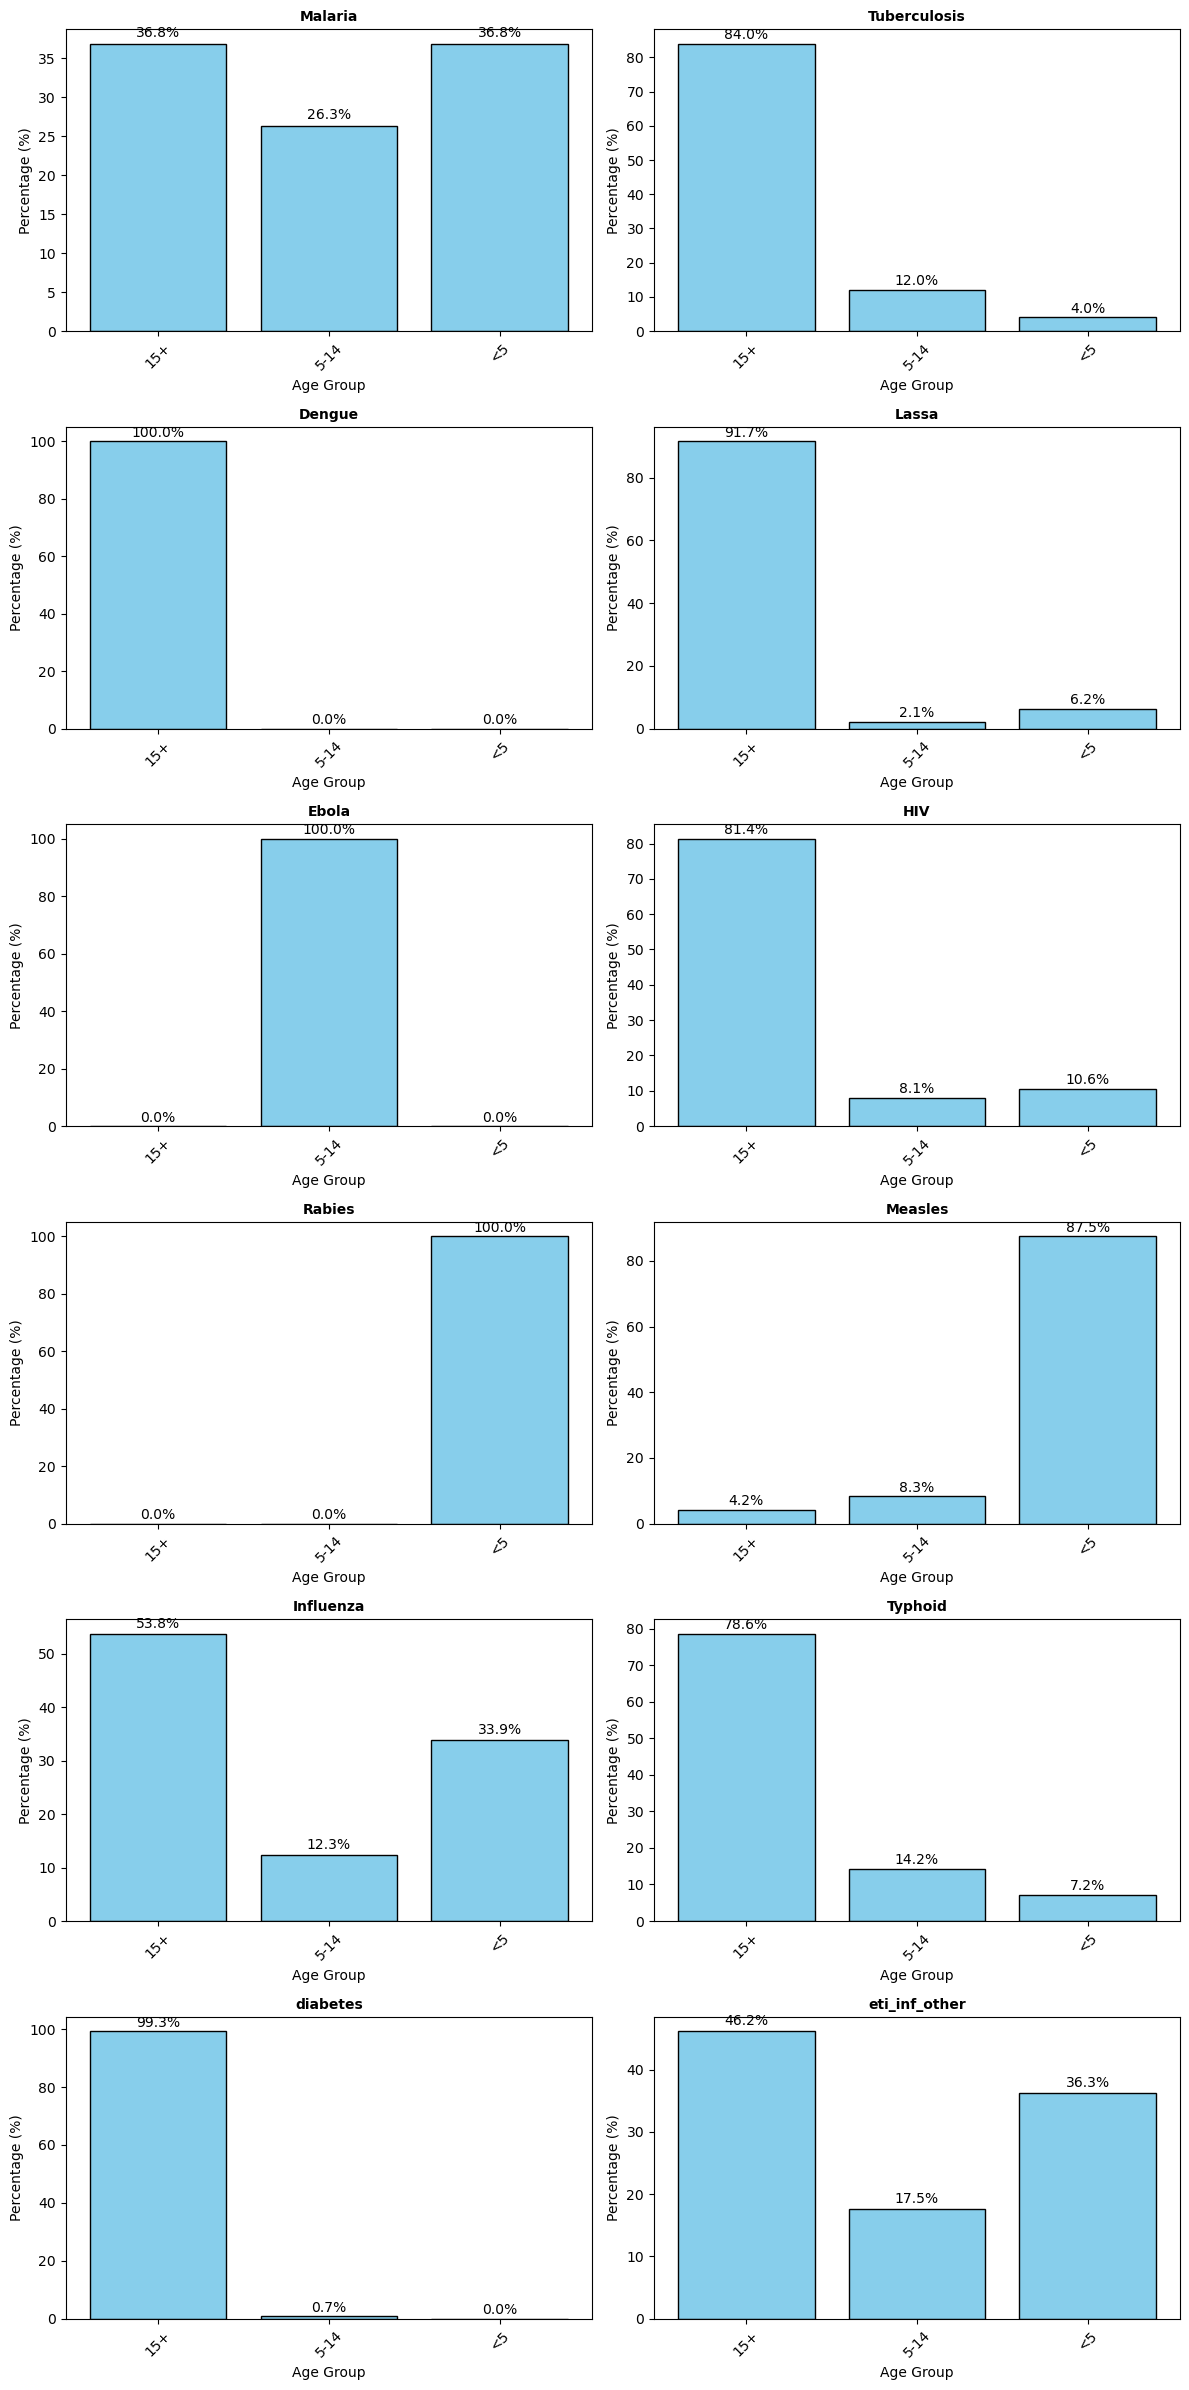

In [168]:


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    counts = data.groupby('age_group')[disease].sum()  # Group by age_group
    total = counts.sum()
    percentages = counts / total * 100  # Calculate percentages
    
    axes[i].bar(counts.index, percentages.values, color='skyblue', edgecolor='black')
    axes[i].set_title(disease, fontsize=10, weight='bold')
    axes[i].set_xlabel("Age Group", fontsize=10)
    axes[i].set_ylabel("Percentage (%)", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Remove the grid
    axes[i].grid(False)
    
    # Add percentages above the bars
    for j, val in enumerate(percentages.values):
        axes[i].text(j, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=10)

# Remove empty axes if the number of diseases is odd
for k in range(i+1, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


In [169]:

print(*data.columns, sep=' , ')
data.shape

Unnamed: 0 , age_group , sid2 , feasibility_contact , hospitalized_last_14_days , signed_consent , date_confirmed , date_inclusion , dob , gender , distance_home_facility , education_level , q11a_inc_1 , q11a_inc_2 , q11a_inc_3 , q11a_inc_4 , q11a_inc_5 , q13c_inc_1 , q13c_inc_2 , q13c_inc_3 , q13c_inc_4 , q13c_inc_5 , q13c_inc_6 , q13h_1_inc_1 , q13h_1_inc_2 , q13h_1_inc_3 , q14a_inc_1 , q14a_inc_2 , q14a_inc_3 , q14a_inc_4 , q14a_inc_5 , q14a_inc_6 , q14a_inc_7 , q14a_inc_8 , q14a_inc_9 , q14a_inc_10 , q14a_inc_11 , q15a_inc_1 , q15a_inc_2 , q15a_inc_3 , q15a_inc_4 , q15a_inc_5 , q15a_inc_6 , q15a_inc_7 , q15a_inc_8 , q15a_inc_9 , q15a_inc_10 , q15a_inc_11 , q15a_inc_12 , q15a_inc_13 , q15a_inc_14 , q15a_inc_15 , q15a_inc_16 , q15a_inc_17 , q15a_inc_18 , duration_of_symptoms , duration_of_fever , q17a_inc_1 , q17a_inc_2 , q17a_inc_3 , q17a_inc_4 , q17a_inc_5 , q17a_inc_6 , q17a_inc_7 , q17a_inc_8 , q17a_inc_9 , q17a_inc_10 , q17a_inc_11 , q17b_inc_1 , q17b_inc_2 , q17b_inc_3 , q17b_i

(9128, 795)

#Create the target variable 

In [170]:
# def classify(row):
#     # Vérifie si Influenza OU Typhoid est 1
#     if row['Influenza'] == 1 or row['Typhoid'] == 1:
#         return 'ILI'
#     elif row['Dengue'] == 1 or row['Lassa'] == 1 or row['Ebola'] == 1:
#         return 'Arbovirus'
#     elif row['Malaria'] == 1 or row['malaria_result'] == 1 or row['eti_malaria'] == 1:
#         return 'Malaria'
#     elif row['inf_digestive'] == 1 or row['sym_abdomen'] == 1 or row['eti_malaria'] == 1:
#         return 'Diarrhoeal disease'
#     else:
#         return 'Other'

# data['syndrome'] = data.apply(classify, axis=1)
# print(data['syndrome'].value_counts())


In [171]:
import pandas as pd
import numpy as np

# =========================================================
# 1️⃣ GARDER UNIQUEMENT LES PATIENTS AVEC FIÈVRE > 38°C
# =========================================================
# Selon définition officielle : fever > 38°C
data = data[data['temperature'] > 38]

# =========================================================
# 2️⃣ SUPPRIMER LES CAS SANS DURÉE DES SYMPTÔMES
# (nécessaire pour ILI et SARI : < 10 jours)
# =========================================================
data = data.dropna(subset=['duration_of_symptoms'])

# =========================================================
# 3️⃣ CONVERTIR LES COLONNES Yes/No EN 1/0
# =========================================================
yes_no_cols = ['sym_chest', 'hospitalized_last_14_days',
               'sym_neurologic', 'sym_musc_bone_joint', 
               'sym_skin_mucosa', 'sym_ent', 'sym_other', 
               'sym_abdomen', 'recent_digestive']

for col in yes_no_cols:
    if col in data.columns:
        data[col] = data[col].map({'Yes': 1, 'No': 0})

# =========================================================
# 4️⃣ DÉFINIR LES SYMPTÔMES RESPIRATOIRES
# (utilisé pour ILI, Arbovirus, SARI)
# =========================================================
respiratory_symptoms = (data['sym_chest'] == 1) | (data['inf_resp'] == 1)

# =========================================================
# 5️⃣ INFLUENZA-LIKE ILLNESS (ILI)
# Fièvre + toux OU mal de gorge + < 10 jours
# Patient NON hospitalisé
# =========================================================
data['ILI'] = (
    respiratory_symptoms & 
    (data['duration_of_symptoms'] <= 10) & 
    (data['hospitalized_last_14_days'] == 0)
).astype(int)

# =========================================================
# 6️⃣ ARBOVIRUS
# Fièvre, SANS symptômes respiratoires
# AU MOINS 2 symptômes parmi la liste OMS
# Patient NON hospitalisé
# =========================================================
arbovirus_cols = ['sym_neurologic', 'sym_musc_bone_joint', 
                  'sym_skin_mucosa', 'sym_ent', 'sym_other']

arbovirus_symptom_count = data[arbovirus_cols].sum(axis=1)

data['Arbovirus'] = (
    (~respiratory_symptoms) &
    (arbovirus_symptom_count >= 2) &
    (data['hospitalized_last_14_days'] == 0)
).astype(int)

# =========================================================
# 7️⃣ MALARIA
# Malaria RDT positif ou indicateurs dans les colonnes
# =========================================================
data['Malaria_case'] = (
    (data['malaria_result'] == 1) |
    (data['eti_malaria'] == 1) |
    (data['Malaria'] == 1)
).astype(int)

# =========================================================
# 8️⃣ DIARRHÉE
# ≥ 3 selles liquides / 24h ou indicateurs digestifs
# =========================================================
data['Diarrhoea'] = (
    (data['recent_digestive'] == 1) |
    (data['sym_abdomen'] == 1) |
    (data['inf_digestive'] == 1)
).astype(int)

# =========================================================
# 9️⃣ SARI (Severe Acute Respiratory Infection)
# Fièvre + toux + < 10 jours + hospitalisation
# =========================================================
data['SARI'] = (
    respiratory_symptoms & 
    (data['duration_of_symptoms'] <= 10) &
    (data['hospitalized_last_14_days'] == 1)
).astype(int)

# =========================================================
# 🔟 CLASSIFICATION FINALE : UNE SEULE COLONNE "syndrome"
# Priorité clinique : SARI > Malaria > Arbovirus > ILI > Diarrhée > Other
# =========================================================
def classify_syndrome(row):
    if row['SARI'] == 1:
        return 'SARI'
    elif row['Malaria_case'] == 1:
        return 'Malaria'
    elif row['Arbovirus'] == 1:
        return 'Arbovirus'
    elif row['ILI'] == 1:
        return 'ILI'
    elif row['Diarrhoea'] == 1:
        return 'Diarrhoeal disease'
    else:
        return 'Other'

data['syndrome'] = data.apply(classify_syndrome, axis=1)

# =========================================================
# 1️⃣1️⃣ VÉRIFICATION DES RÉSULTATS
# =========================================================
print(data['syndrome'].value_counts())


c:\Users\de\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\de\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\de\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

Malaria               4196
ILI                    947
Other                  797
Diarrhoeal disease     377
Arbovirus               64
Name: syndrome, dtype: int64


In [172]:
# Vérifier les valeurs uniques
print(data['sym_chest'].unique())
print(data['inf_resp'].unique())
print(data['hospitalized_last_14_days'].unique())
print(data['duration_of_symptoms'].describe())


[0 1]
[0. 1.]
[0 1]
count    6381.000000
mean        5.199499
std        14.873790
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       365.000000
Name: duration_of_symptoms, dtype: float64


In [173]:
# columns_to_check = ['headache', 'arthralgia', ' myalgia-like backache', 'skinrash', 'retroorbital_pain', 'hemorrhage']

# for col in columns_to_check:
#     if col in data.columns:
#         print(f"{col} existe dans le DataFrame")
#     else:
#         print(f"{col} **n'existe pas** dans le DataFrame")


In [174]:
data.to_csv('C:/Users/de/Documents/Intership at MRC/GitHub/FISSA/fissa_ili_arbo/alerrt_fissa/Data/Cleaned_fissa_data.csv', index=False)


In [175]:
data.shape

(6381, 801)

In [176]:
df= pd.read_csv("../data/Cleaned_fissa_data.csv")
df.head()

,Unnamed: 0,age_group,sid2,feasibility_contact,hospitalized_last_14_days,signed_consent,date_confirmed,date_inclusion,dob,gender,...,date_exit,d_last_visit,ptime,age,ILI,Arbovirus,Malaria_case,Diarrhoea,SARI,syndrome
0,0,<5,1,Yes,0,Yes,2020-12-21,2020-12-21,2020-03-20,Male,...,2020-12-28,21.0,7.0,6.0,0,0,1,0,0,Malaria
1,1,<5,2,Yes,0,Yes,2020-02-20,2020-02-20,2020-03-20,Male,...,2020-02-27,21.0,7.0,6.0,0,0,1,0,0,Malaria
2,2,<5,3,Yes,0,Yes,2020-02-21,2020-02-21,2018-08-01,Male,...,2020-02-27,20.0,6.0,2.0,1,0,1,1,0,Malaria
3,3,<5,4,Yes,0,Yes,2020-02-21,2020-02-21,2020-03-20,Female,...,2020-02-28,21.0,7.0,6.0,0,0,1,1,0,Malaria
4,4,<5,5,Yes,0,Yes,2020-02-21,2020-02-21,2020-03-20,Male,...,2020-02-26,19.0,5.0,6.0,0,0,1,0,0,Malaria


In [177]:
df.shape

(6381, 801)

In [178]:

print(*df.columns, sep=' , ')
df.shape

Unnamed: 0 , age_group , sid2 , feasibility_contact , hospitalized_last_14_days , signed_consent , date_confirmed , date_inclusion , dob , gender , distance_home_facility , education_level , q11a_inc_1 , q11a_inc_2 , q11a_inc_3 , q11a_inc_4 , q11a_inc_5 , q13c_inc_1 , q13c_inc_2 , q13c_inc_3 , q13c_inc_4 , q13c_inc_5 , q13c_inc_6 , q13h_1_inc_1 , q13h_1_inc_2 , q13h_1_inc_3 , q14a_inc_1 , q14a_inc_2 , q14a_inc_3 , q14a_inc_4 , q14a_inc_5 , q14a_inc_6 , q14a_inc_7 , q14a_inc_8 , q14a_inc_9 , q14a_inc_10 , q14a_inc_11 , q15a_inc_1 , q15a_inc_2 , q15a_inc_3 , q15a_inc_4 , q15a_inc_5 , q15a_inc_6 , q15a_inc_7 , q15a_inc_8 , q15a_inc_9 , q15a_inc_10 , q15a_inc_11 , q15a_inc_12 , q15a_inc_13 , q15a_inc_14 , q15a_inc_15 , q15a_inc_16 , q15a_inc_17 , q15a_inc_18 , duration_of_symptoms , duration_of_fever , q17a_inc_1 , q17a_inc_2 , q17a_inc_3 , q17a_inc_4 , q17a_inc_5 , q17a_inc_6 , q17a_inc_7 , q17a_inc_8 , q17a_inc_9 , q17a_inc_10 , q17a_inc_11 , q17b_inc_1 , q17b_inc_2 , q17b_inc_3 , q17b_i

(6381, 801)